In [16]:
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, average_precision_score

In [2]:
# Create a sample dataset with imbalanced classes (spam detection is often imbalanced)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['label'] = y

In [3]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,label
0,-0.429244,-2.211862,0.189756,0.588553,0.820374,-0.180392,-1.150654,1.471709,0.701585,-0.833474,...,0.702818,-0.225999,1.533434,1.372848,0.673782,0.742188,0.944224,-0.266652,1.401753,0
1,-0.045512,-2.084113,-3.189191,-0.424236,-2.472718,0.508269,-2.850971,0.911854,0.472527,-1.210002,...,-2.126279,1.908717,1.724697,3.926238,0.736881,3.447367,2.551819,0.287329,-0.842841,0
2,0.252195,1.617045,1.565132,-1.970309,2.048682,0.509295,-0.238676,1.445465,0.673300,-0.529416,...,1.758406,-1.076195,-0.770425,-0.616071,0.528587,-0.516697,0.107330,0.184859,2.090307,0
3,1.725694,-0.516117,2.210866,0.121844,2.667175,-1.059212,0.107509,1.527901,0.705332,-0.442889,...,2.289787,-1.482342,2.124556,-0.500261,0.504980,-1.048914,-0.217528,-0.179620,2.497511,0
4,-0.749416,1.106232,-0.664455,0.337766,-0.054664,0.552905,-1.497095,1.233776,0.597581,-0.871460,...,-0.048795,0.320768,0.200699,-0.936592,0.644399,1.366224,1.281389,-0.344477,0.748926,0


In [4]:
df['label'].value_counts()

label
0    900
1    100
Name: count, dtype: int64

In [5]:
# Split dataset into train and validation sets
X = df.drop(columns=['label'])
y = df['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
y_train.describe()

count    700.000000
mean       0.100000
std        0.300215
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: label, dtype: float64

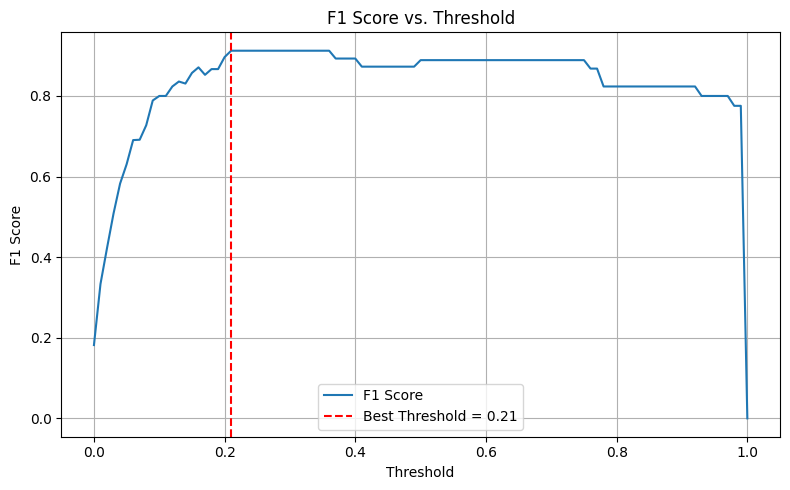

(np.float64(0.21), 0.9122807017543859)

In [6]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get prediction probabilities on validation set
y_probs = model.predict_proba(X_val)[:, 1]

# Sweep thresholds and calculate F1 score
thresholds = np.linspace(0, 1, 101)
f1_scores = [f1_score(y_val, y_probs >= t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

# Plot F1 score vs. threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(best_threshold, best_f1)

In [8]:
# Sweep thresholds and calculate precision, recall, F1
thresholds = np.linspace(0, 1, 101)
precisions = [precision_score(y_val, y_probs >= t) for t in thresholds]
recalls = [recall_score(y_val, y_probs >= t) for t in thresholds]
f1s = [f1_score(y_val, y_probs >= t) for t in thresholds]

#

# Compile metrics into a DataFrame
metrics_df = pd.DataFrame({
    'threshold': thresholds,
    'precision': precisions,
    'recall': recalls,
    'f1_score': f1s
})

/Users/ssah/Documents/datascience/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
metrics_df

,threshold,precision,recall,f1_score
0,0.00,0.100000,1.000000,0.181818
1,0.01,0.200000,1.000000,0.333333
2,0.02,0.267857,1.000000,0.422535
3,0.03,0.340909,1.000000,0.508475
4,0.04,0.410959,1.000000,0.582524
...,...,...,...,...
96,0.96,1.000000,0.666667,0.800000
97,0.97,1.000000,0.666667,0.800000
98,0.98,1.000000,0.633333,0.775510
99,0.99,1.000000,0.633333,0.775510


In [ ]:

# Identify best threshold by F1
best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]

# Display metrics table
import ace_tools as tools; tools.display_dataframe_to_user("Metrics by Threshold", metrics_df)

# Compute confusion matrix at best threshold
cm = confusion_matrix(y_val, y_probs >= best_threshold)
cm_df = pd.DataFrame(cm, index=['Actual Negative (0)', 'Actual Positive (1)'],
                     columns=['Predicted Negative (0)', 'Predicted Positive (1)'])
tools.display_dataframe_to_user("Confusion Matrix at Best Threshold", cm_df)

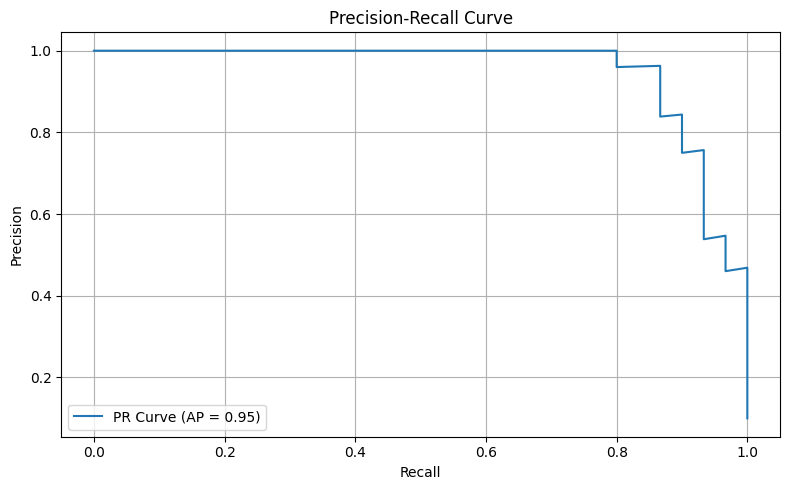

In [17]:
# Compute precision-recall pairs and average precision
precision, recall, _ = precision_recall_curve(y_val, y_probs)
avg_precision = average_precision_score(y_val, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()